# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


# Data description

In [ ]:
df = pd.read_csv("/content/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


df.describe()

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
categorical_variables = ["season", "holiday", "weekday", "workingday", "weathersit", "yr", "mnth", "hr"]
numerical_variables = ["temp", "atemp", "hum", "windspeed","casual", "registered", "cnt"]

print(f'There are {len(categorical_variables)} categorical variables.')
print(f'There are {len(numerical_variables)} numerical variables.')

There are 8 categorical variables.
There are 7 numerical variables.


# Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


[Text(0.5, 1.0, 'Rented bikes acording to Month ')]

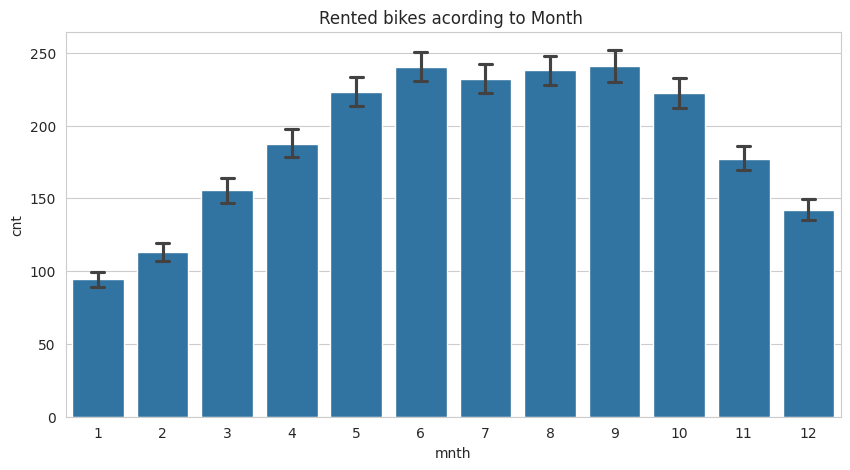

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='mnth',y='cnt',ax=ax,capsize=.2)
ax.set(title='Rented bikes acording to Month ')

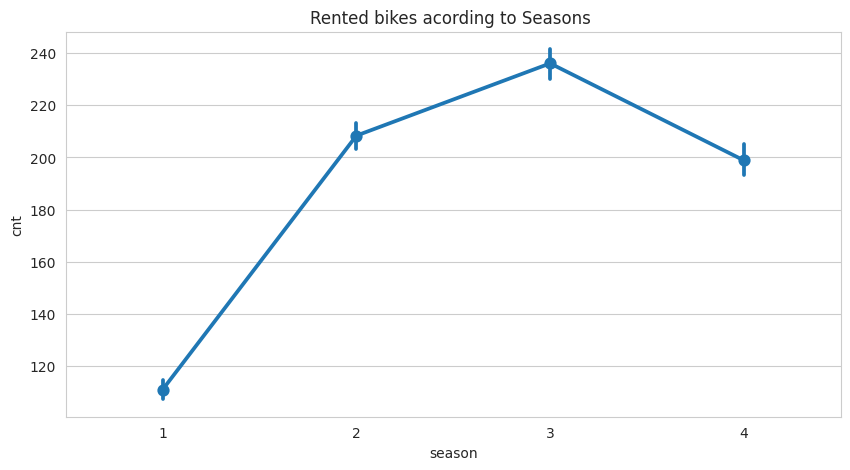

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(data=df,x='season',y='cnt',ax=ax)
ax.set(title='Rented bikes acording to Seasons ');

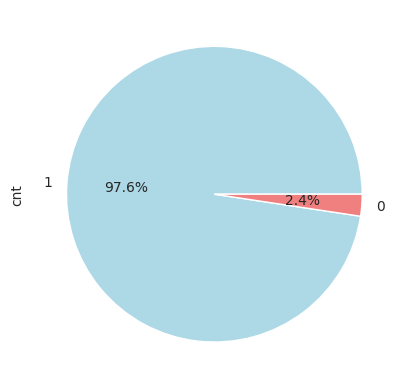

In [ ]:
df.groupby('holiday').sum()['cnt'].plot.pie(radius=1, autopct='%1.1f%%', labels=['1', '0'], colors=['lightblue', 'lightcoral']);


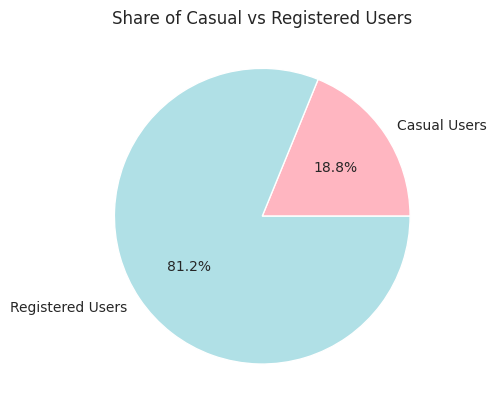

In [ ]:
values = [df["casual"].sum(), df["registered"].sum()]
lbl = ("Casual Users", "Registered Users")

plt.pie(values, labels = lbl, autopct = "%.1f%%", colors = ("#FFB6C1", "#B0E0E6"))
plt.title("Share of Casual vs Registered Users")
plt.show()

#Data Preprocessing

## Duplicates values

In [ ]:
duplicates =len(df[df.duplicated()])
duplicates

0

## Null values

In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df = df.drop(["dteday", "instant"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


## Outlier

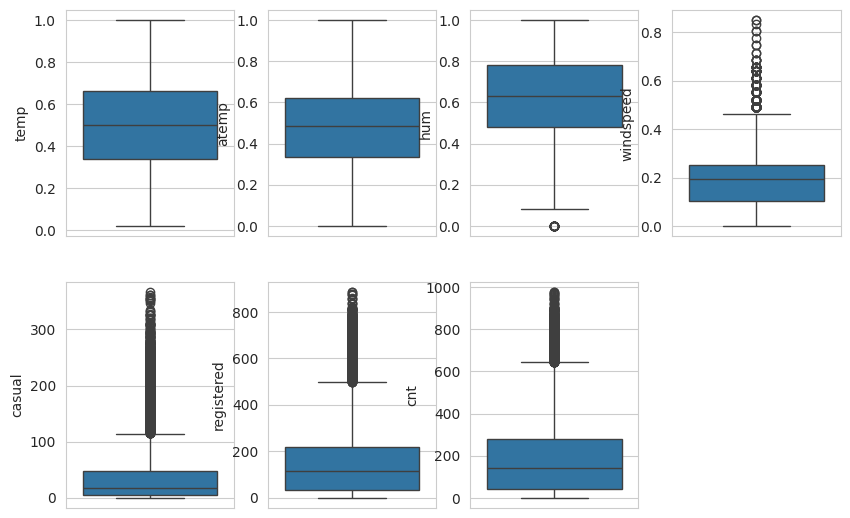

In [ ]:
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in numerical_variables]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

In [ ]:
# Apply winsorizing to the specified numerical columns
outliers = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in outliers:
    lower_bound = df[col].quantile(0.10)
    upper_bound = df[col].quantile(0.90)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Winsorizing applied to the following columns:", numerical_variables)

Winsorizing applied to the following columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


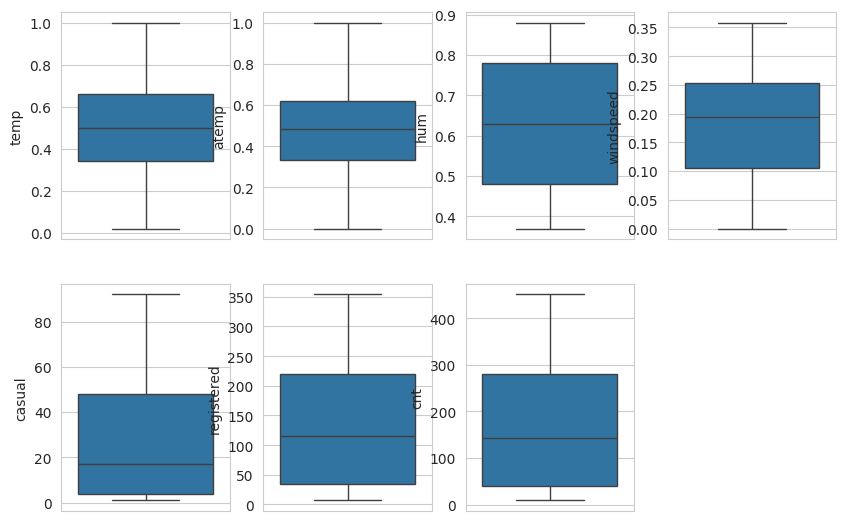

In [ ]:
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in numerical_variables]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

## Korelasi

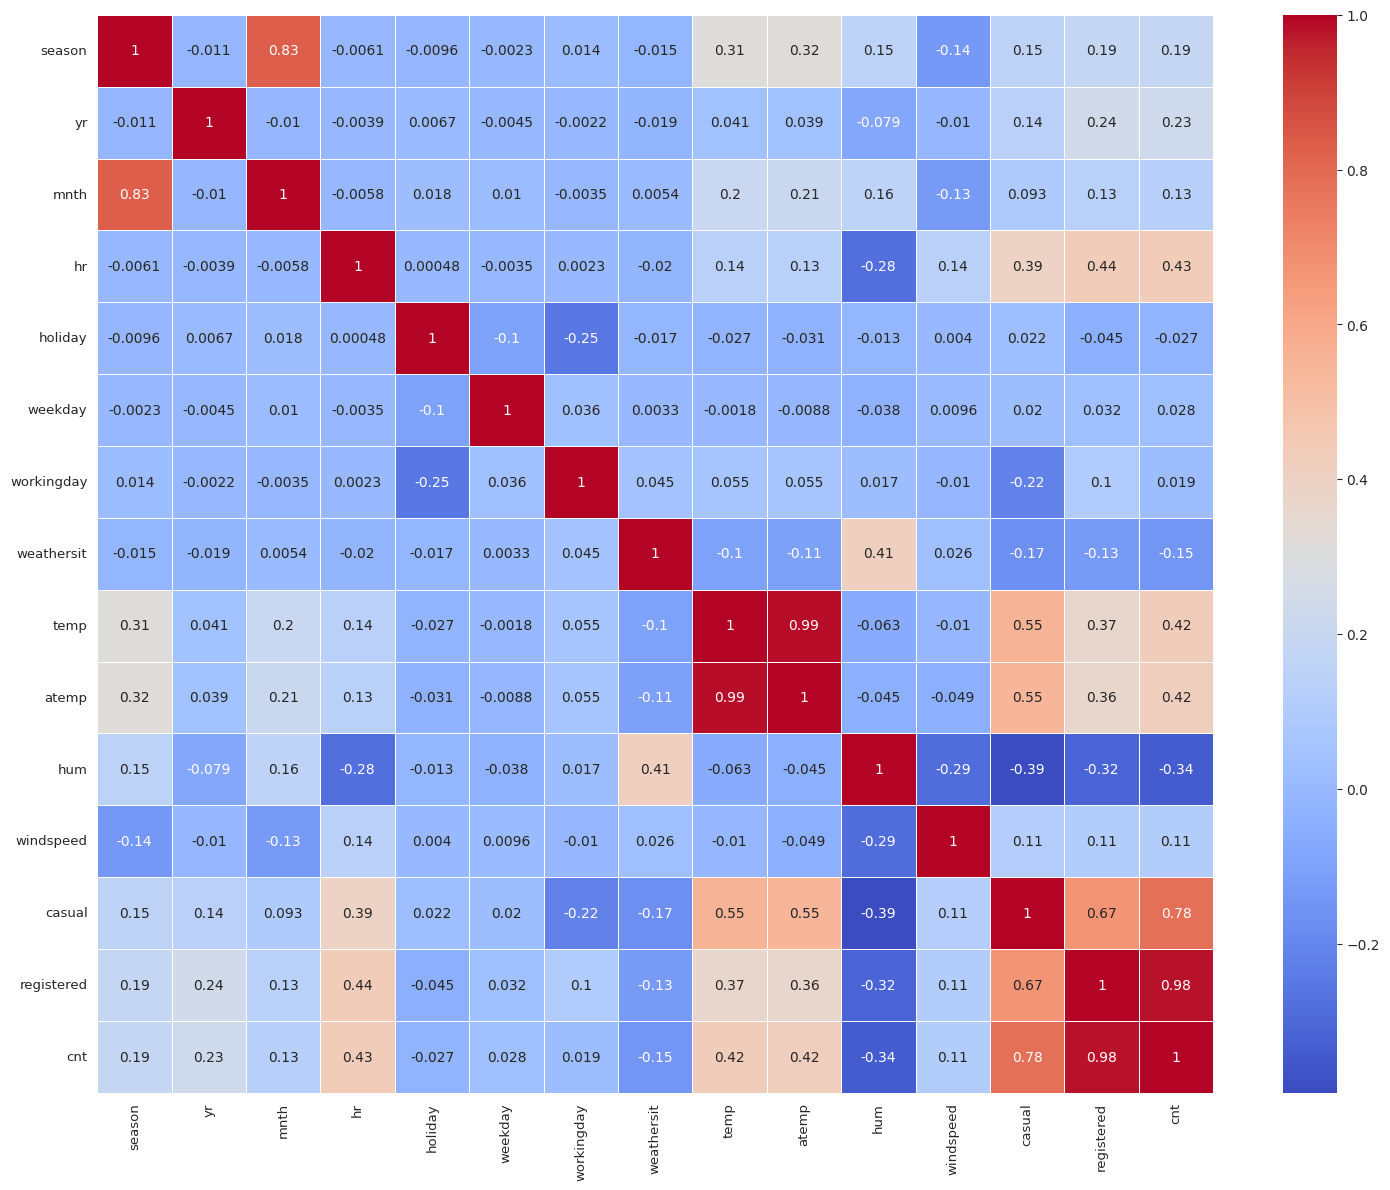

In [ ]:
plt.figure(figsize=(18,14))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, cmap='coolwarm', annot=True)
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.show()

##Multikoliearitas

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# variabel independen (tanpa cnt)
X = df[["temp", "atemp", "hum", "windspeed", "casual", "registered"]]

# tambah konstanta
X = sm.add_constant(X)

# hitung VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable        VIF
0       const  35.800993
1        temp  43.688349
2       atemp  43.800555
3         hum   1.328460
4   windspeed   1.153354
5      casual   2.522542
6  registered   1.823971


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# variabel independen (tanpa cnt)
X = df[["temp", "hum", "windspeed", "casual", "registered"]]

# tambah konstanta
X = sm.add_constant(X)

# hitung VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable        VIF
0       const  33.206262
1        temp   1.508488
2         hum   1.322940
3   windspeed   1.091721
4      casual   2.520180
5  registered   1.821760


# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  float64
 13  registered  17379 non-null  float64
 14  cnt         17379 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.0 MB


In [ ]:
df = df.drop(["casual", "registered", "atemp"], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16.0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40.0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32.0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13.0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,9.0


##Onehot encoding

In [ ]:
month = pd.get_dummies(df['mnth'], prefix='mnth', dtype=int)
month.head()

,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
hour = pd.get_dummies(df['hr'], prefix='hr', dtype=int)
hour.head()

,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
weekday = pd.get_dummies(df['weekday'], prefix='weekday', dtype=int)
weekday.head()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [ ]:
seasons = pd.get_dummies(df['season'], dtype=int)
seasons.columns = ['season_winter', 'season_spring', 'season_summer', 'season_fall']
seasons.head()

,season_winter,season_spring,season_summer,season_fall
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
years = pd.get_dummies(df['yr'], dtype=int)
years.columns = ['yr_2011', 'yr_2012']
years.head()

,yr_2011,yr_2012
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
holiday = pd.get_dummies(df['holiday'], dtype=int)
holiday.columns = ['nonholiday', 'holiday']
holiday.head()

,nonholiday,holiday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
workingday = pd.get_dummies(df['workingday'], dtype=int)
workingday.columns = ['workday', 'nonworkday']
workingday.head()

,workday,nonworkday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


weathersit:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah)
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Berkabut)
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain (Hujan/salju ringan)
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog + Scattered clouds (Badai)

In [ ]:
weathersit = pd.get_dummies(df['weathersit'], dtype=int)
weathersit.columns = ['cerah', 'berkabut', 'hujan_salju_ringan', 'badai']
weathersit.head()

,cerah,berkabut,hujan_salju_ringan,badai
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
df = pd.concat([df,month, hour, weekday,seasons,years,holiday,weathersit, workingday],axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,...,yr_2011,yr_2012,nonholiday,holiday,cerah,berkabut,hujan_salju_ringan,badai,workday,nonworkday
0,1,0,1,0,0,6,0,1,0.24,0.81,...,1,0,1,0,1,0,0,0,1,0
1,1,0,1,1,0,6,0,1,0.22,0.80,...,1,0,1,0,1,0,0,0,1,0
2,1,0,1,2,0,6,0,1,0.22,0.80,...,1,0,1,0,1,0,0,0,1,0
3,1,0,1,3,0,6,0,1,0.24,0.75,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,4,0,6,0,1,0.24,0.75,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
df.drop(['mnth', 'hr', 'weekday','season', 'yr', 'holiday', 'workingday', 'weathersit'],axis=1,inplace=True)

In [ ]:
df.head()

,temp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,season_fall,yr_2011,yr_2012,nonholiday,cerah,berkabut,hujan_salju_ringan,badai,workday,nonworkday
0,0.24,0.81,0.0,16.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
1,0.22,0.80,0.0,40.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
2,0.22,0.80,0.0,32.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
3,0.24,0.75,0.0,13.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
4,0.24,0.75,0.0,9.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0


##Kelas Y

In [ ]:
mean_cnt = df['cnt'].mean()

# buat kelas 0/1
df['count_class'] = df['cnt'].apply(lambda x: 0 if x <= mean_cnt else 1)

# pastikan tipe data integer
df['count_class'] = df['count_class'].astype(int)

df[['cnt', 'count_class']].head()

,cnt,count_class
0,16.0,0
1,40.0,0
2,32.0,0
3,13.0,0
4,9.0,0


In [ ]:
df.head()

,temp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,yr_2011,yr_2012,nonholiday,cerah,berkabut,hujan_salju_ringan,badai,workday,nonworkday,count_class
0,0.24,0.81,0.0,16.0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
1,0.22,0.80,0.0,40.0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
2,0.22,0.80,0.0,32.0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
3,0.24,0.75,0.0,13.0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
4,0.24,0.75,0.0,9.0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0


## Training dan testing

In [ ]:
X = df.drop(['cnt', 'count_class'], axis=1)
y = df['count_class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((13903, 59), (3476, 59))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

# **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Fit model ke data training
knn.fit(X_train, y_train)

# 3. Prediksi data testing
y_pred_knn = knn.predict(X_test)

# 4. Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89614499424626

Confusion Matrix:
 [[1751  224]
 [ 137 1364]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1975
           1       0.86      0.91      0.88      1501

    accuracy                           0.90      3476
   macro avg       0.89      0.90      0.89      3476
weighted avg       0.90      0.90      0.90      3476



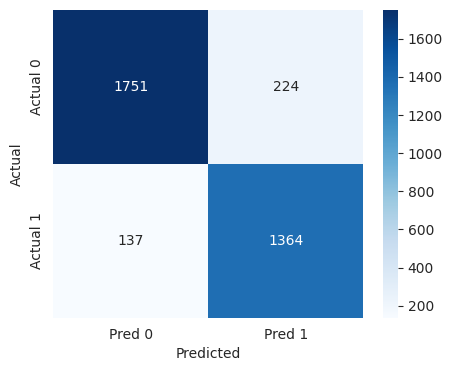

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# FKNN

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import NearestNeighbors

def fknn_predict(X_train, y_train, X_test, k=5, m=2):

    # pastikan numpy array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)

    # cari tetangga terdekat dengan KNN
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_train)

    distances, indices = nn.kneighbors(X_test)

    preds = []

    for i, neighbors in enumerate(indices):

        # jarak tetangga
        d = distances[i]

        # kalau ada jarak = 0 (data identik), langsung ambil labelnya
        if np.any(d == 0):
            preds.append(y_train[neighbors[d == 0][0]])
            continue

        # hitung fuzzy membership
        weights = 1 / (d ** (2 / (m - 1)))

        # total weight utk kelas 0 dan 1
        w0 = np.sum(weights[y_train[neighbors] == 0])
        w1 = np.sum(weights[y_train[neighbors] == 1])

        # pilih kelas dengan membership terbesar
        pred = 0 if w0 > w1 else 1
        preds.append(pred)

    return np.array(preds)

In [ ]:
y_pred_fknn = fknn_predict(X_train, y_train, X_test, k=7, m=2)
print("Accuracy:", accuracy_score(y_test, y_pred_fknn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_fknn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_fknn))

Accuracy: 0.8972957422324511

Confusion Matrix:
 [[1768  207]
 [ 150 1351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1975
           1       0.87      0.90      0.88      1501

    accuracy                           0.90      3476
   macro avg       0.89      0.90      0.90      3476
weighted avg       0.90      0.90      0.90      3476



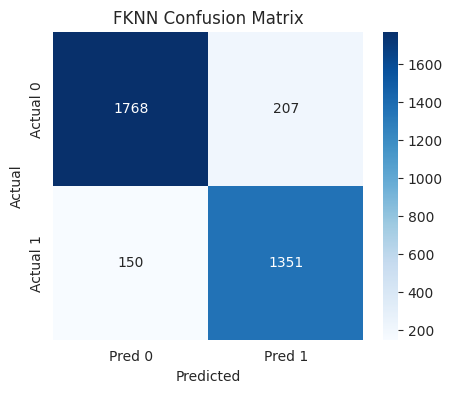

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_fknn = confusion_matrix(y_test, y_pred_fknn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_fknn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FKNN Confusion Matrix")
plt.show()

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,     # jumlah pohon (boleh 100–500)
    max_depth=None,      # biarkan None biar otomatis
    random_state=0
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9318181818181818


In [ ]:
import pandas as pd

cm_rf_df = pd.DataFrame(cm,
                        index=['Actual 0', 'Actual 1'],
                        columns=['Predicted 0', 'Predicted 1'])

print(cm_rf_df)

          Predicted 0  Predicted 1
Actual 0         1751          224
Actual 1          137         1364


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1975
           1       0.93      0.91      0.92      1501

    accuracy                           0.93      3476
   macro avg       0.93      0.93      0.93      3476
weighted avg       0.93      0.93      0.93      3476



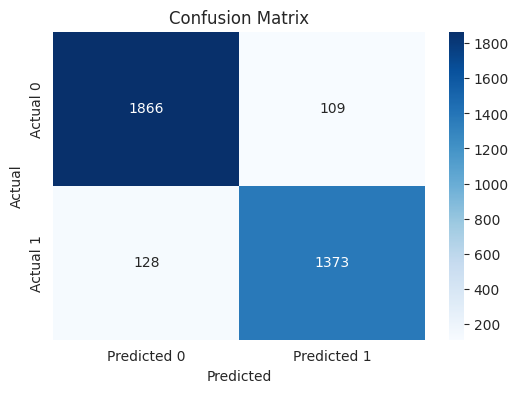

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# hitung confusion matrix (contoh: untuk Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

#KNN
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

knn_row = {
    "Model": "KNN",
    "Accuracy": report_knn["accuracy"],
    "Precision (kelas 0)": report_knn["0"]["precision"],
    "Precision (kelas 1)": report_knn["1"]["precision"],
    "Recall (kelas 0)": report_knn["0"]["recall"],
    "Recall (kelas 1)": report_knn["1"]["recall"],
    "F1-score (kelas 0)": report_knn["0"]["f1-score"],
    "F1-score (kelas 1)": report_knn["1"]["f1-score"]
}

#FKNN
report_fknn = classification_report(y_test, y_pred_fknn, output_dict=True)

fknn_row = {
    "Model": "F-KNN",
    "Accuracy": report_fknn["accuracy"],
    "Precision (kelas 0)": report_fknn["0"]["precision"],
    "Precision (kelas 1)": report_fknn["1"]["precision"],
    "Recall (kelas 0)": report_fknn["0"]["recall"],
    "Recall (kelas 1)": report_fknn["1"]["recall"],
    "F1-score (kelas 0)": report_fknn["0"]["f1-score"],
    "F1-score (kelas 1)": report_fknn["1"]["f1-score"]
}

#Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

rf_row = {
    "Model": "Random Forest",
    "Accuracy": report_rf["accuracy"],
    "Precision (kelas 0)": report_rf["0"]["precision"],
    "Precision (kelas 1)": report_rf["1"]["precision"],
    "Recall (kelas 0)": report_rf["0"]["recall"],
    "Recall (kelas 1)": report_rf["1"]["recall"],
    "F1-score (kelas 0)": report_rf["0"]["f1-score"],
    "F1-score (kelas 1)": report_rf["1"]["f1-score"]
}


In [ ]:
df_compare = pd.DataFrame([knn_row, fknn_row, rf_row])
df_compare


df_compare.style \
  .background_gradient(
      cmap="YlGnBu",
      subset=df_compare.columns[1:]
  ) \
  .set_properties(**{
      "text-align": "center",
      "font-weight": "bold",
      "border": "1px solid black"
  }) \
  .set_table_styles([
      # Header
      {"selector": "th", "props": [
          ("background-color", "#1f4e79"),
          ("color", "white"),
          ("text-align", "center"),
          ("border", "1px solid black")
      ]},
      # Sel data
      {"selector": "td", "props": [
          ("border", "1px solid black")
      ]},
      # Tabel
      {"selector": "table", "props": [
          ("border-collapse", "collapse"),
          ("border", "2px solid black")
      ]}
  ])



,Model,Accuracy,Precision (kelas 0),Precision (kelas 1),Recall (kelas 0),Recall (kelas 1),F1-score (kelas 0),F1-score (kelas 1)
0,KNN,0.896145,0.927436,0.858942,0.886582,0.908728,0.906549,0.883134
1,F-KNN,0.897296,0.921794,0.867137,0.895190,0.900067,0.908297,0.883295
2,Random Forest,0.931818,0.935807,0.926451,0.944810,0.914724,0.940287,0.920550
